# 2 - Att lära en perceptron

I den här notebooken tittar vi på hur man implementerar inlärning i en perceptron. Perceptronen initialiseras med random-värden och vet alltså ingenting. 

Vi gör två saker:

1. Tränar perceptronen att känna igen att 1 är 1 och 0 är 0 
1. Tränar perceptronen att negera det input den får. 

In [10]:
import random
import numpy as np

In [11]:
#Perceptronen har en stegvis aktiveringsfunktion, alltså returnerar 0 eller 1.
def step_function(x, threshold):
    if x < threshold:
        return 0
    elif x >= threshold:
        return 1
#Klass som implementerar en 1-input perceptron (en klass för att kunna hålla reda på state och därmed behålla inlärningen)
class Perceptron1():
    
    def __init__(self, w1, threshold, activation_function): #vad är w1?
        self.w1 = w1
        self.threshold = threshold
        self.activation_function = activation_function
    
    def activate(self, x1):
        output = self.activation_function(x1 * self.w1, self.threshold)#skalärprodukt
        return output
#Vi tränar vår perceptron 50 gånger, learning rate handlar om hur vi sätter vikter i varje iteration, 
#hög siffra, stor ändring, färre iteration, låg siffra, mindre ändring, kräver fler iterationer 
    def train(self, X, y, learning_rate=0.01, iterations=50):
        self.w1 = random.uniform(0, 0.1)
        self.threshold = random.uniform(-1, 1)
        self.errors = []
        #breadcrumps är "historik över errors", kan implementeras utan denna funktion, används för att vikta rätt.
        self.w1_breadcrumbs = []
        self.t_breadcrumbs = [self.threshold]

        for _ in range(iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = learning_rate * (target - self.activate(xi))
                self.w1 +=  update * xi
                self.w1 +=  update
                errors += int(update != 0.0)
            self.w1_breadcrumbs.append(self.w1)
            self.errors.append(errors)
            # if the errors are getting more, reset the threshold randomly
            if self.errors[-1] > self.errors[0]:
                self.threshold = random.uniform(-1, 1)
                self.t_breadcrumbs.append(self.threshold)

Sätt upp en defaultperceptron som inte kan någonting:

In [12]:
# default state
p1 = Perceptron1(w1=0.001, threshold=0.5, activation_function=step_function)

In [13]:
p1.activate(0)

0

In [14]:
p1.activate(1)

0

Nu tränar vi vår perceptron att känna igen 1 och 0

In [15]:
p1.train([1, 0, 1, 0, 0], [1, 0, 1, 0, 0])

In [16]:
p1.activate(1)

1

In [17]:
p1.activate(0)

0

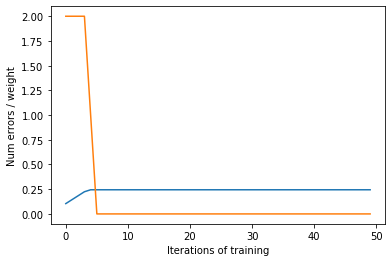

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylabel('Num errors / weight')
plt.xlabel('Iterations of training')
plt.plot(np.array(p1.w1_breadcrumbs))
plt.plot(np.array(p1.errors))

Tränar samma perceptron igen för att lära sig negera 1 och 0 (alltså byta tecken).

In [19]:
p1.train([1, 0, 1, 0, 0], [0, 1, 0, 1, 1])

In [20]:
p1.activate(0)

1

In [21]:
p1.activate(1)

0

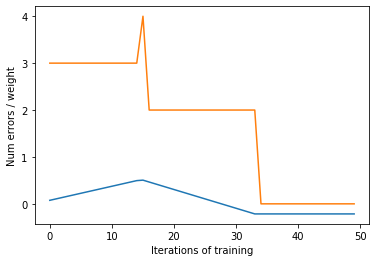

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylabel('Num errors / weight')
plt.xlabel('Iterations of training')
plt.plot(np.array(p1.w1_breadcrumbs))
plt.plot(np.array(p1.errors))